In [2]:
# Imports
import operator
from collections import Counter
from bitarray import bitarray
import mmh3
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np 


In [3]:
# read data and assign column names, if u are changing dataset(this is scenario 10), then accordingly change the cols, else an error will pop up 
cols = (
   'date', 'flow_start', 'duration', 'protocol', 'src_addrIP',
    'direction', 'dst_addrIP', 'flags', 'tos', 'packets',
    'bytes', 'flows', 'label', )
dataset = pd.read_csv('capture20110818.pcap.netflow.labeled', header=0,names=cols,skiprows=1, sep='\s+')

In [4]:
stream_ips = dataset.iloc[:,6]

In [5]:
#see the ip addresses 
stream_ips 

0             147.32.84.59:43087
1              82.39.2.249:41915
2              147.32.192.34:993
3            147.32.86.166:33426
4                 147.32.84.2:80
5             147.32.86.24:31002
6            151.41.188.39:49621
7             147.32.84.118:1153
8                   82.73.244.56
9            147.32.86.110:48190
10            80.78.79.156:51287
11             147.32.84.59:2774
12            192.221.106.126:80
13            147.32.86.135:3978
14            212.111.2.151:8000
15               95.172.94.54:80
16               95.172.94.54:80
17            147.32.84.59:43087
18           114.78.14.160:31011
19            147.32.85.88:56949
20            188.95.61.42:53389
21          195.250.146.100:8000
22           147.32.84.229:13363
23         122.176.204.167:16041
24           147.32.86.165:12114
25             147.32.86.88:3389
26           147.32.86.166:48761
27            147.32.84.138:8080
28           147.32.203.229:2971
29          194.108.204.22:48747
          

In [6]:
# Printing the number of distinct source IP addresses
print("The number of distinct IP addresses is: %s" %len(set(stream_ips)))
# Printing the total number of source IP addresses
print("The number of total IP addresses is: %s" %len(stream_ips))

The number of distinct IP addresses is: 563138
The number of total IP addresses is: 5180850


In [7]:
# count the frequency of each IP address
freq = Counter(stream_ips)

# Sort them according to their value to find the 13 most frequent ones
sorted_el = sorted(freq.items(), key=operator.itemgetter(1), reverse = True)

# Print the 10 most frequent IP addresses
for i in range(10):
    print (sorted_el[i])

('147.32.84.229:13363', 697697)
('147.32.80.9:53', 482735)
('147.32.96.69', 213654)
('147.32.84.229:443', 64190)
('147.32.80.13:80', 58950)
('147.32.86.116:19083', 40959)
('147.32.85.26:62860', 20678)
('147.32.84.111:5938', 15218)
('76.13.114.90:80', 15087)
('147.32.84.229:80', 15026)


(array([313., 157., 527., 131., 165., 137., 132., 165., 134., 138.]),
 array([   0. ,  115.1,  230.2,  345.3,  460.4,  575.5,  690.6,  805.7,
         920.8, 1035.9, 1151. ]),
 <a list of 10 Patch objects>)

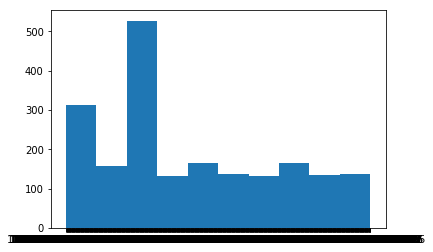

In [8]:
# distribution of a minimum 2000 ips 

%matplotlib inline 

plt.hist(dataset.iloc[1:2000,6])

(array([4535492.,       0.,       0.,       0.,       0.,  323441.,
              0.,       0.,       0.,  321917.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

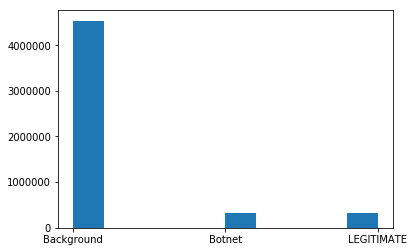

In [12]:
labels = dataset.iloc[:,12]
plt.hist(labels)

In [9]:
# implementation of FREQUENT (Misra - Gries) algorithm, that is ideal for computation 
def frequent(stream, k):
    freqD = {}
    for value in stream:
        if value in freqD:
            freqD[value]+=1

        elif len(freqD) < k:
            freqD[value] = 1

        else:
            for existing_value in freqD:
                freqD[existing_value]-=1
            freqD = {x: y for x, y in freqD.items() if y != 0}
       
    return freqD

In [10]:
# Running the FREQUENT algorithm

# initialize fraction u can change the value of k and experiment 
k = 1000000

# Find elements whose frequency exceeds 1/k fraction of the total count
elements = frequent(stream_ips, k)

# Sort them according to their value to find the 13 most frequent ones
sorted_freq = sorted(elements.items(), key=operator.itemgetter(1), reverse = True)

print("The 10 most frequent IP addresses are:")

for i in range(10):
    print(sorted_freq[i])
#try ploting if time permits
#%matplotlib inline
#plt.hist(sorted_freq)

The 10 most frequent IP addresses are:
('147.32.84.229:13363', 697697)
('147.32.80.9:53', 482735)
('147.32.96.69', 213654)
('147.32.84.229:443', 64190)
('147.32.80.13:80', 58950)
('147.32.86.116:19083', 40959)
('147.32.85.26:62860', 20678)
('147.32.84.111:5938', 15218)
('76.13.114.90:80', 15087)
('147.32.84.229:80', 15026)


In [11]:
# Running the FREQUENT algorithm
#reservior sampling 
# initialize fraction
for k in [10, 100, 1000]:
    
    
    # Find elements whose frequency exceeds 1/k fraction of the total count
    elements = frequent(stream_ips, k)

    # Sort them according to their value to find the 13 most frequent ones
    sorted_freq = sorted(elements.items(), key=operator.itemgetter(1), reverse = True)

        
    if len(sorted_freq)<10:
        num = len(sorted_freq)
    else:
        num = 10
        
    print("The %s most frequent IP addresses with k = %s are: \n (right hand side = real ips, left hand side = ips by reserviour sampling  )\n" %(num,k))

    for i in range(num):
        print("FREQUENT #%s: %s\t \t REAL #%s: %s" %(i, sorted_freq[i], i, sorted_el[i]))
        
        # sorted_el contains the real frequencies of the IPs.
        # print it  as well, if you want to see the differences in the same page.
        #print(sorted_el[i])

The 9 most frequent IP addresses with k = 10 are: 
 (right hand side = real ips, left hand side = ips by reserviour sampling  )

FREQUENT #0: ('147.32.84.229:13363', 255962)	 	 REAL #0: ('147.32.84.229:13363', 697697)
FREQUENT #1: ('147.32.80.9:53', 41032)	 	 REAL #1: ('147.32.80.9:53', 482735)
FREQUENT #2: ('147.32.96.69', 24743)	 	 REAL #2: ('147.32.96.69', 213654)
FREQUENT #3: ('147.32.84.59:56028', 1)	 	 REAL #3: ('147.32.84.229:443', 64190)
FREQUENT #4: ('130.89.164.161:50621', 1)	 	 REAL #4: ('147.32.80.13:80', 58950)
FREQUENT #5: ('147.32.84.229:443', 1)	 	 REAL #5: ('147.32.86.116:19083', 40959)
FREQUENT #6: ('109.198.198.186:16221', 1)	 	 REAL #6: ('147.32.85.26:62860', 20678)
FREQUENT #7: ('147.32.84.59:60960', 1)	 	 REAL #7: ('147.32.84.111:5938', 15218)
FREQUENT #8: ('147.32.84.21:34713', 1)	 	 REAL #8: ('76.13.114.90:80', 15087)
The 10 most frequent IP addresses with k = 100 are: 
 (right hand side = real ips, left hand side = ips by reserviour sampling  )

FREQUENT #0: ('

# Now computing the error rates with varying sample sizes 


In [14]:
# stream_ips is a list containing the IPs in temporal order

train = stream_ips[:int(len(stream_ips)/2)]
test = stream_ips[int(len(stream_ips)/2):]

# Check size of train and test set
print("The size of the total data: %s" %len(stream_ips))
print("The size of the training data: %s" %len(train))
print("The size of the testing data: %s" %len(test))

The size of the total data: 5180850
The size of the training data: 2590425
The size of the testing data: 2590425


In [15]:
# We firstly create two sets from our training and testing dataset
train_set = set(train)
test_set = set(test)

# check the intersection to see number of training and testing size overlap
inter = set.intersection(train_set, test_set)

# The real number of source IPs in the test set which also occur in the train set
gt = len(inter) # our ground truth
print("There are %s source IPs in the test set which also occur in the train set"%gt)

There are 124800 source IPs in the test set which also occur in the train set


In [18]:
class BloomFilter:
    
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        
    def add(self, string):
        for seed in range(self.hash_count):
            result = mmh3.hash(string, seed) % self.size
            self.bit_array[result] = 1
        
    def lookup(self, string):
        for seed in range(self.hash_count):
            result = mmh3.hash(string, seed) % self.size
            if self.bit_array[result] == 0:
                return "No"
        return "yes"

In [19]:
n = len(train_set) # expected number of items
p = 0.000001 # probability percentage
m = - (n* math.log(p)) /(math.log(2)**2) # size of the bit array
k = (m/n)* math.log(2) # number of hash functions

m = round(m)
k = round(k)

print("Bit array size: %s" %m)
print("Number of hash functions required: %s" %k)

bf = BloomFilter(m, k)

# Adding training set's IPs
for ip in train_set:
    bf.add(ip)

print("IPs from the training set")

# lookup for the IPs in the test set
count = 0
for ip in test_set:
    if bf.lookup(ip) == "yes":
        count+=1
print("There are no more than %s source IPs in the test set which also occur in the train set"%count)

Bit array size: 9547811
Number of hash functions required: 20
IPs from the training set
There are no more than 124800 source IPs in the test set which also occur in the train set


In [22]:
n = len(train_set) # expected number of items

results = {} # dictionary with the results for different bit array sizes

for m in [10, 100, 1000]:
    k = (m/n)* math.log(2) # number of hash functions
    k = round(k)
    print(" Size of bit array: %s" %m)
    print("Number of hash functions: %s \n" %k)
    bf = BloomFilter(m, k)
 
    # Adding training set's IPs
    for ip in train_set:
        bf.add(ip)

    # lookup for the IPs in the test set
    
    for ip in test_set:
        if bf.lookup(ip) == "yes":
            if m in results:
                results[m].append(ip)
            else:
                results[m] = [ip]

Running for bit array size: 10
Number of hash functions: 0 

Running for bit array size: 100
Number of hash functions: 0 

Running for bit array size: 1000
Number of hash functions: 0 



In [24]:
n = len(train_set) # expected number of items

results = {} # dictionary with the results for different bit array sizes
fpr = {}  # dictionary with the false positive rates for different bit array sizes

# for each bit array size, u can change sizes and try
for m in [500000, 1000000, 2000000, 4000000, 8000000, 10000000]:
    # calculate k
    k = (m/n)* math.log(2) # number of hash functions
    k = round(k)
    print("Running for bit array size: %s" %m)
    print("Number of hash functions: %s" %k)
    
    # define bloom filter
    bf = BloomFilter(m, k)
 
    # Adding training set's IPs
    for ip in train_set:
        bf.add(ip)

    # lookup for the IPs in the test set and if they exist in the training set store them in results.
    for ip in test_set:
        if bf.lookup(ip) == "yes":
            if m in results:
                results[m].append(ip)
            else:
                results[m] = [ip]
    
    # False positive rate
    # The total number of testing set's IPs we said they possibly exist in the training set minus 
    # the actual number of the co-occured IPs. 
    fp = len(results[m]) - gt
    tn = len(test_set) - len(results[m])
    fpr[m] = fp/(fp+tn)
    print("The number of test set's IPs which are possibly in the training set are: %s" %len(results[m]))
    print("The false positive rate is: %s \n" %fpr[m])

Running for bit array size: 500000
Number of hash functions: 1
The number of test set's IPs which are possibly in the training set are: 236792
The false positive rate is: 0.48460406750324536 

Running for bit array size: 1000000
Number of hash functions: 2
The number of test set's IPs which are possibly in the training set are: 178956
The false positive rate is: 0.23434011250540893 

Running for bit array size: 2000000
Number of hash functions: 4
The number of test set's IPs which are possibly in the training set are: 137583
The false positive rate is: 0.05531371700562527 

Running for bit array size: 4000000
Number of hash functions: 8
The number of test set's IPs which are possibly in the training set are: 125547
The false positive rate is: 0.0032323669407183036 

Running for bit array size: 8000000
Number of hash functions: 17
The number of test set's IPs which are possibly in the training set are: 124801
The false positive rate is: 4.327131112072696e-06 

Running for bit array size